# Домашнее задание 2(2)

Импортируем всё

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
random.seed = 23
from pymorphy2 import MorphAnalyzer
from string import punctuation
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.corpus import webtext
from nltk.probability import FreqDist
plt.rcParams['font.family'] = 'fantasy'
plt.rcParams['font.fantasy'] = 'Arial' 

Читаем и чистим текст

In [2]:
text = open('book1.txt', 'r', encoding='utf-8').read()
for word in text.split():
    word.lower().strip(punctuation)  # всё со строчной, без пунктуации

In [3]:
sw = stopwords.words('russian')
words = [w.lower() for w in word_tokenize(text) if w.isalpha()]
filtered = [w for w in words if w not in sw]

## 1. Делаем датафрейм

In [4]:
morph = MorphAnalyzer()
name_list = []
for word in filtered:
    #d = dict()
    d = dict({
    'слово': word,
        'лемма': morph.parse(word)[0].normal_form,
        'часть речи': morph.parse(word)[0].tag.POS,
        'одушевлённость': morph.parse(word)[0].tag.animacy,
        'вид': morph.parse(word)[0].tag.aspect,
        'падеж': morph.parse(word)[0].tag.case,
        'род': morph.parse(word)[0].tag.gender,
        'включённость говорящего в действие': morph.parse(word)[0].tag.involvement,
        'наклонение': morph.parse(word)[0].tag.mood,
        'число': morph.parse(word)[0].tag.number,
        'лицо': morph.parse(word)[0].tag.person,
        'время': morph.parse(word)[0].tag.tense,
        'переходность': morph.parse(word)[0].tag.transitivity,
        'залог': morph.parse(word)[0].tag.voice
    })
    name_list.append(d)
df = pd.DataFrame(name_list)
df_1 = df[['слово', 'лемма', 'часть речи', 'число', 'род', 'падеж', 'одушевлённость', 'вид', 'переходность', 'время', 
           'залог', 'лицо', 'наклонение', 'включённость говорящего в действие']]
df_1.head(30)

,слово,лемма,часть речи,число,род,падеж,одушевлённость,вид,переходность,время,залог,лицо,наклонение,включённость говорящего в действие
0,войнич,войнич,NOUN,sing,masc,nomn,anim,None,None,None,None,None,None,None
1,этель,этель,NOUN,sing,femn,nomn,anim,None,None,None,None,None,None,None
2,лилиан,лилиан,NOUN,sing,femn,nomn,anim,None,None,None,None,None,None,None
3,овод,овод,NOUN,sing,masc,nomn,anim,None,None,None,None,None,None,None
4,этель,этель,NOUN,sing,femn,nomn,anim,None,None,None,None,None,None,None
5,лилиан,лилиан,NOUN,sing,femn,nomn,anim,None,None,None,None,None,None,None
6,войнич,войнич,NOUN,sing,masc,nomn,anim,None,None,None,None,None,None,None
7,овод,овод,NOUN,sing,masc,nomn,anim,None,None,None,None,None,None,None
8,автора,автор,NOUN,sing,masc,gent,anim,None,None,None,None,None,None,None
9,приношу,приносить,VERB,sing,None,None,None,impf,tran,pres,None,1per,indc,None


## 2. Строим графики с семинара

#### 1. Смотрим распределение слов по длине

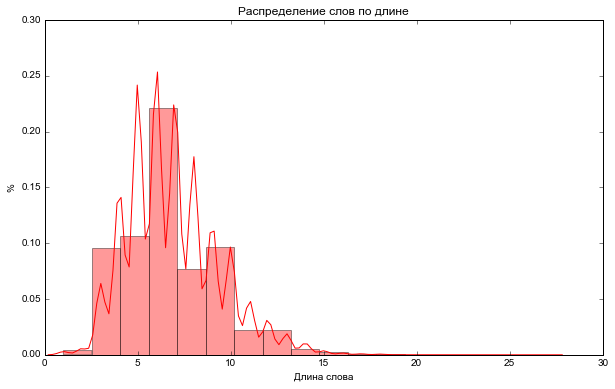

In [5]:
df_1 = df_1.copy()
df_1['длина'] = df_1['слово'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(df_1['длина'], bins=17, color='red')
plt.title('Распределение слов по длине')
plt.ylabel('%')
plt.xlabel('Длина слова');

#### 2. Смотрим распределение родов по частям речи

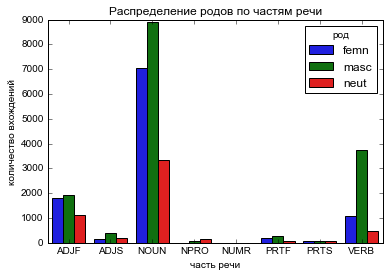

In [6]:
df2 = df_1[
    (df_1['род'] != None )
][
    ['часть речи', 'род', 'число']
].groupby(['часть речи', 'род'], as_index=False).count()

df2.columns = ['часть речи', 'род', 'total']
sns.barplot(x="часть речи", y="total", hue='род', data=df2)
plt.title('Распределение родов по частям речи')
plt.xlabel('часть речи')
plt.ylabel('количество вхождений');

#### 3. Делаем облако слов

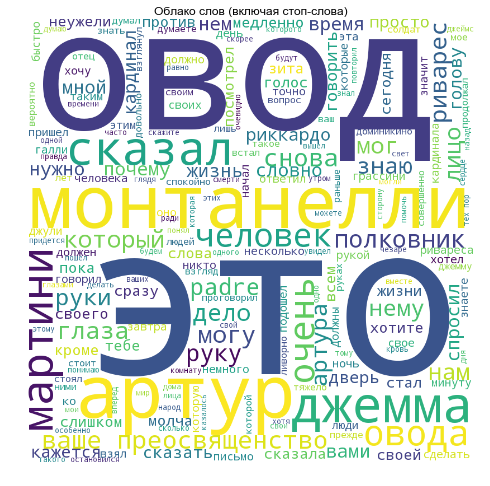

In [7]:
stops = set(stopwords.words('russian') + ['это', 'весь', 'который', 'мочь', 'свой'])
text = ' '.join(df_1['слово'])

wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=800, 
).generate(text)

plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов (включая стоп-слова)')
plt.show()

## 3. Строим свои графики

#### 1. Посмотрим, как распределены падежи существительных. Мы хотим узнать только доли, для этого подходит круговая диаграмма.

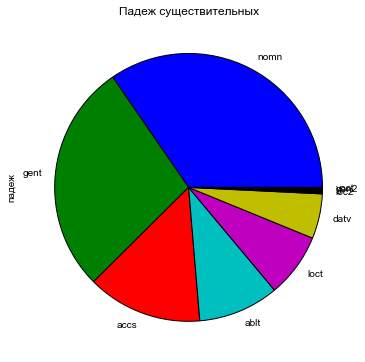

In [8]:
plt.figure(figsize=(6, 6))
df_1[df_1['часть речи'] == 'NOUN']['падеж'].value_counts().plot(kind='pie')
plt.title('Падеж существительных');

##### Всё понятно, но какие-то падежи сливаются. Можем построить столбчатый график, чтобы было яснее.

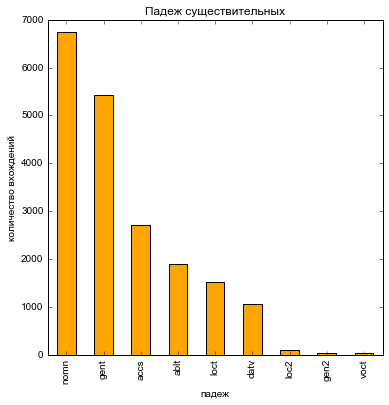

In [9]:
plt.figure(figsize=(6, 6))
df_1[df_1['часть речи'] == 'NOUN']['падеж'].value_counts().plot(kind='bar', color='orange')
plt.title('Падеж существительных')
plt.xlabel('падеж')
plt.ylabel('количество вхождений');

#### 2. Хотим узнать, в каком времени чаще всего употребляются глаголы в единственном числе. Это позволяет сделать вывод о повествовании в тексте.

##### Можно попробовать график, которого ещё не было.

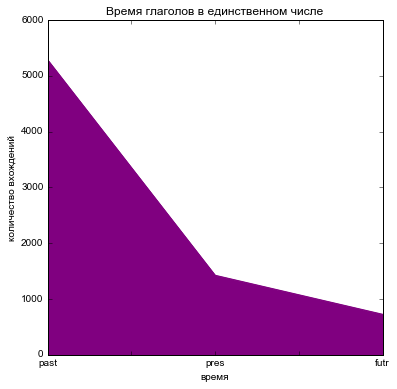

In [10]:
plt.figure(figsize=(6, 6))
df_1[(df_1['число'] == 'sing')&(df_1['часть речи'] == 'VERB')]['время'].value_counts().plot(kind='area', color='purple')
plt.title('Время глаголов в единственном числе')
plt.xlabel('время')
plt.ylabel('количество вхождений');

##### Он всё показывает, но в этом случае удобнее круговая диаграмма

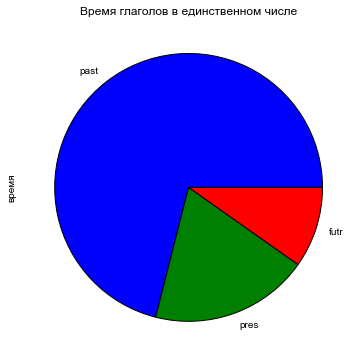

In [11]:
plt.figure(figsize=(6, 6))
df_1[(df_1['число'] == 'sing')&(df_1['часть речи'] == 'VERB')]['время'].value_counts().plot(kind='pie')
plt.title('Время глаголов в единственном числе');

## 4. Делаем nltk dispersion plot по героям

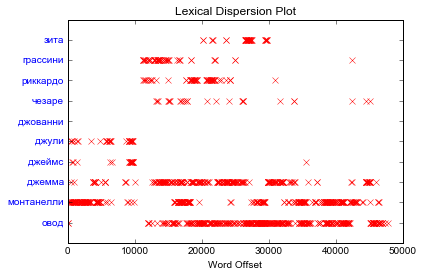

In [12]:
words = ['овод', 'монтанелли', 'джемма', 'джеймс', 'джули', 'джованни', 'чезаре', 'риккардо', 'грассини', 'зита']
wt_words = word_tokenize(text)  # токенизируем
points = [(x, y) for x in range(len(wt_words))
          for y in range(len(words)) if wt_words[x] == words[y]]
 
if points:
    x, y = zip(*points) # склеиваем
else:
    x = y = ()
 
plt.plot(x, y, "rx", scalex=.1)
plt.yticks(range(len(words)), words, color="b")
plt.ylim(-1, len(words))
plt.title("Lexical Dispersion Plot")
plt.xlabel("Word Offset")
plt.show()